In [1]:
import requests

# get 방식 데이터를 보여줌 post방식은 로그인할때 씀(안보여줌 데이터)
# print(requests.get('http://naver.com').text) # 200 나온거면 정상통신이다. 404 not found는 안좋음

# endpoint url 과 key 값이 필요하다.
subscription_key = '3de8eb01de6942a2b83b3e605446dae4'

In [2]:
# com 뒤에 /vision 과 v2.0을 붙여준다.
endpoint = 'https://labuser9vision.cognitiveservices.azure.com/vision/v2.0/'

In [3]:
analyze_url = endpoint + 'analyze'

In [4]:
image_url = 'https://image-notepet.akamaized.net/resize/620x-/seimage/20210705%2F34543d84bd467bd5560904f49289e811.jpg'

In [5]:
from PIL import Image
from io import BytesIO

# 이미지는 바이너리 데이터 여서 이렇게 가져온다.
imgbin = requests.get(image_url).content
imgbyte = BytesIO(imgbin)

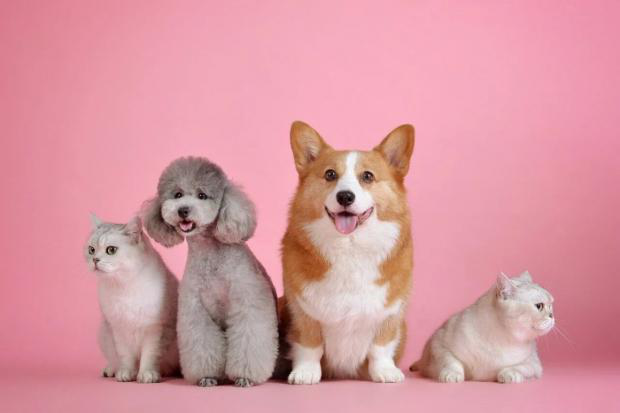

In [6]:
image = Image.open(imgbyte)
image

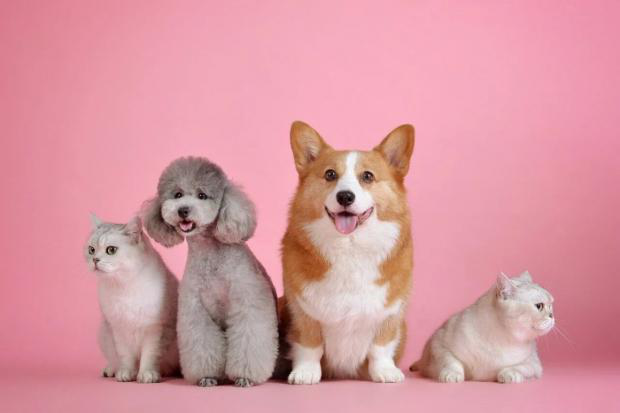

In [7]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [8]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [9]:
response = requests.post(analyze_url,headers=headers,params=params,json=data)

In [10]:
result = response.json()

In [11]:
result

{'categories': [],
 'color': {'dominantColorForeground': 'Pink',
  'dominantColorBackground': 'Pink',
  'dominantColors': ['Pink'],
  'accentColor': 'AC1F41',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'dog',
   'indoor',
   'animal',
   'mammal',
   'orange',
   'cat',
   'standing',
   'small',
   'looking',
   'table',
   'front',
   'brown',
   'pink',
   'large'],
  'captions': [{'text': 'a cat sitting next to a dog',
    'confidence': 0.7219859251714843}]},
 'requestId': '95368336-ef4f-4be6-bd9c-bd0653cc585e',
 'metadata': {'height': 413, 'width': 620, 'format': 'Jpeg'}}

In [12]:
result['description']

{'tags': ['sitting',
  'dog',
  'indoor',
  'animal',
  'mammal',
  'orange',
  'cat',
  'standing',
  'small',
  'looking',
  'table',
  'front',
  'brown',
  'pink',
  'large'],
 'captions': [{'text': 'a cat sitting next to a dog',
   'confidence': 0.7219859251714843}]}

In [13]:
# 개와 고양이 이미지
image_url = 'https://image-notepet.akamaized.net/resize/620x-/seimage/20210705%2F34543d84bd467bd5560904f49289e811.jpg'

In [14]:
# Object detect 용 endPoint
detect_url = endpoint + 'detect'

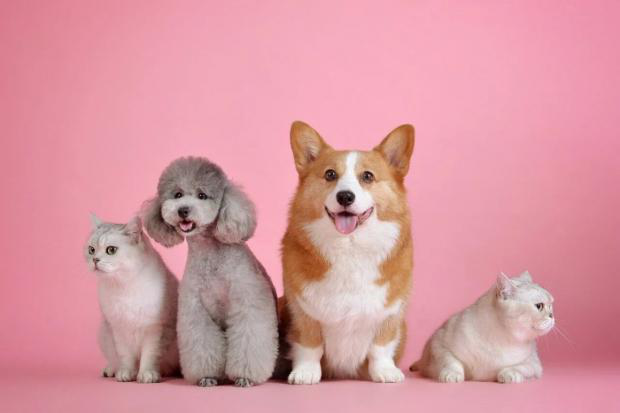

In [15]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [16]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
data = {'url':image_url}

In [17]:
response = requests.post(detect_url,headers=headers,json=data)

In [18]:
result = response.json()
result['objects']

[{'rectangle': {'x': 279, 'y': 116, 'w': 144, 'h': 275},
  'object': 'corgi',
  'confidence': 0.753,
  'parent': {'object': 'dog',
   'confidence': 0.871,
   'parent': {'object': 'mammal',
    'confidence': 0.879,
    'parent': {'object': 'animal', 'confidence': 0.879}}}},
 {'rectangle': {'x': 84, 'y': 212, 'w': 98, 'h': 169},
  'object': 'dog',
  'confidence': 0.713,
  'parent': {'object': 'mammal',
   'confidence': 0.798,
   'parent': {'object': 'animal', 'confidence': 0.799}}},
 {'rectangle': {'x': 150, 'y': 162, 'w': 132, 'h': 221},
  'object': 'dog',
  'confidence': 0.708,
  'parent': {'object': 'mammal',
   'confidence': 0.752,
   'parent': {'object': 'animal', 'confidence': 0.752}}},
 {'rectangle': {'x': 417, 'y': 263, 'w': 139, 'h': 126},
  'object': 'cat',
  'confidence': 0.503,
  'parent': {'object': 'mammal',
   'confidence': 0.819,
   'parent': {'object': 'animal', 'confidence': 0.82}}}]

In [19]:
from PIL import Image,ImageDraw,ImageFont
# 메모리로 펼쳐놓기위해 ImageDraw를 사용한다. 
draw = ImageDraw.Draw(image)

# 이미지 좌표는 0,0이 좌측 맨위 상단이다.
def drawRectangle(detectResult):
  objects = detectResult['objects']
  for obj in objects:
    print(obj)
    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red')
    
    objectName = obj['object']
    draw.text((x,y),objectName,fill='red')



{'rectangle': {'x': 279, 'y': 116, 'w': 144, 'h': 275}, 'object': 'corgi', 'confidence': 0.753, 'parent': {'object': 'dog', 'confidence': 0.871, 'parent': {'object': 'mammal', 'confidence': 0.879, 'parent': {'object': 'animal', 'confidence': 0.879}}}}
{'rectangle': {'x': 84, 'y': 212, 'w': 98, 'h': 169}, 'object': 'dog', 'confidence': 0.713, 'parent': {'object': 'mammal', 'confidence': 0.798, 'parent': {'object': 'animal', 'confidence': 0.799}}}
{'rectangle': {'x': 150, 'y': 162, 'w': 132, 'h': 221}, 'object': 'dog', 'confidence': 0.708, 'parent': {'object': 'mammal', 'confidence': 0.752, 'parent': {'object': 'animal', 'confidence': 0.752}}}
{'rectangle': {'x': 417, 'y': 263, 'w': 139, 'h': 126}, 'object': 'cat', 'confidence': 0.503, 'parent': {'object': 'mammal', 'confidence': 0.819, 'parent': {'object': 'animal', 'confidence': 0.82}}}


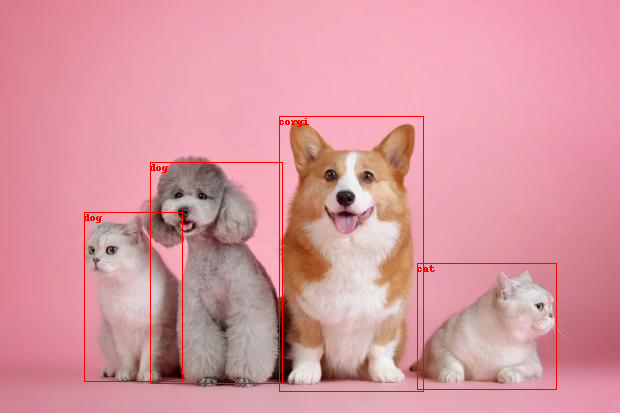

In [20]:
drawRectangle(result)
image